In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import scipy.stats as stats
import pymc as pm
import arviz as az

sns.set_style("whitegrid")

print(pm.__version__)
print(az.__version__)

5.7.2
0.16.0


In [2]:
train_classify = pd.read_csv('train_clf.csv')
test_classify = pd.read_csv('test_clf.csv')

In [3]:
display(train_classify.tail())
display(test_classify.head())

,a,b,c,y
95,2.491194,0.685869,3.200508,1.0
96,5.798723,6.416613,0.224369,0.0
97,6.553074,8.428001,-0.687934,0.0
98,1.441131,4.369016,-1.913370,1.0
99,1.699959,8.014732,-4.988070,1.0


,a,b,c
0,6.106970,8.712798,-1.523174
1,5.796587,10.704556,-3.947281
2,6.041652,6.628682,0.602950
3,2.201992,1.272898,1.716670
4,4.501528,3.148547,2.082501


In [4]:
X_train = np.array(train_classify[['a', 'b', 'c']])
y_train = np.array(train_classify['y'])
X_test = np.array(test_classify[['a', 'b', 'c']])

In [5]:
X_means = X_train.mean(axis=0)
X_1 = (X_train-X_means)

In [6]:
X_test_means = X_test.mean(axis=0)
X_test_1 = (X_test-X_test_means)

In [7]:
len(y_train)

100

### Задание 1

In [8]:
with pm.Model() as model_1: 
    α_tmp = pm.Normal('α_tmp', mu=0, sigma=10) 
    β = pm.Normal('β', mu=0, sigma=2, shape=3) 
     
    μ = α_tmp + pm.math.dot(X_1, β) 
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ)) 
    α = pm.Deterministic('α', α_tmp - pm.math.dot(β,X_means))
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * (X_1[:,0]+X_means[0]))
    
    yl = pm.Bernoulli('yl', p=θ, observed=y_train) 
 
    trace_1 = pm.sample(1000, chains = 4, cores = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α_tmp, β]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/utils.py:185: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/utils.py:185: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α_tmp,-0.638,0.708,-1.917,0.732,0.016,0.012,1977.0,2072.0,1.01
β[0],-2.289,1.212,-4.647,-0.070,0.037,0.026,1047.0,1311.0,1.01
β[1],-1.885,1.153,-3.932,0.316,0.035,0.025,1110.0,1915.0,1.00
β[2],-0.009,1.072,-1.995,2.029,0.035,0.025,948.0,1309.0,1.01
θ[0],0.001,0.003,0.000,0.004,0.000,0.000,2360.0,2031.0,1.00
...,...,...,...,...,...,...,...,...,...
bd[95],8.599,51.247,-12.480,25.439,0.803,0.572,1689.0,2077.0,1.01
bd[96],2.509,43.105,-12.157,17.809,0.679,0.481,1685.0,2004.0,1.00
bd[97],1.120,64.341,-21.358,24.043,1.013,0.718,1670.0,2058.0,1.01
bd[98],10.533,80.866,-23.345,35.823,1.269,0.902,1673.0,2065.0,1.01


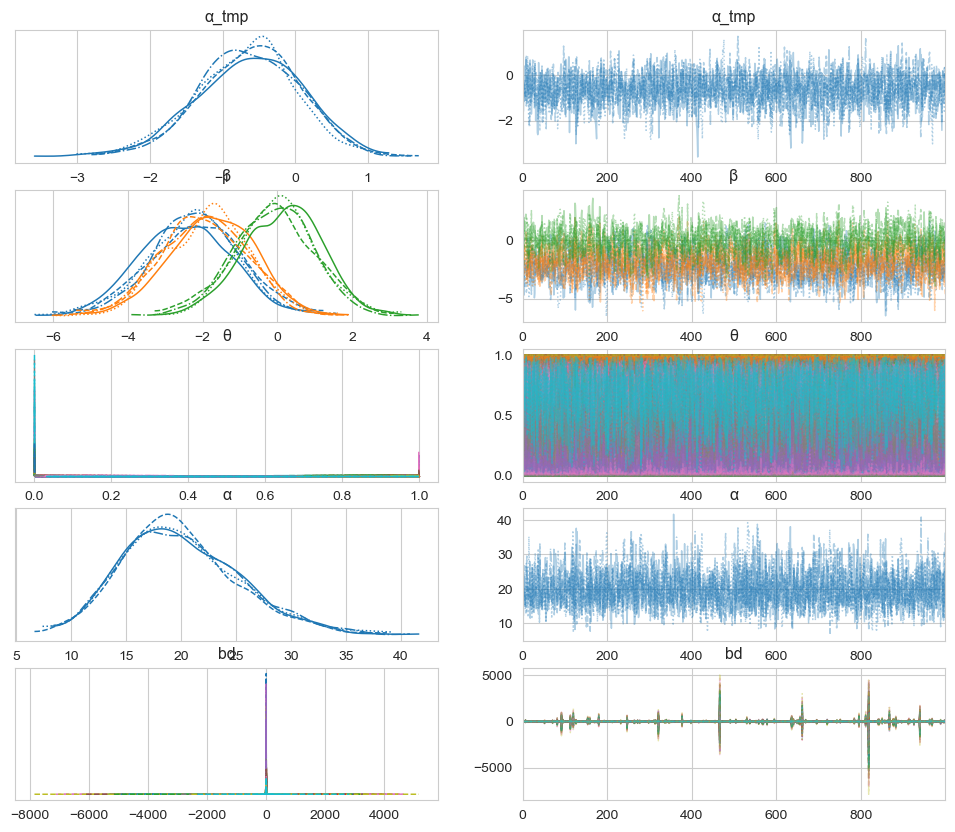

In [9]:
az.plot_trace(trace_1);
az.summary(trace_1)

In [10]:
posterior_1 = trace_1.posterior.stack(samples=("chain", "draw"))

In [11]:
posterior_1['θ'].values.T

array([[9.36857524e-04, 3.46662813e-07, 9.99994426e-01, ...,
        1.99324749e-04, 9.99556931e-01, 9.00455847e-01],
       [3.10844514e-03, 7.24503029e-06, 9.99976687e-01, ...,
        9.37069485e-04, 9.97330023e-01, 6.10033469e-01],
       [8.56345599e-06, 1.58015736e-10, 9.99999959e-01, ...,
        9.85822756e-07, 9.99953606e-01, 8.25066743e-01],
       ...,
       [1.18068480e-02, 7.17194338e-05, 9.99622755e-01, ...,
        4.39071026e-03, 9.89888154e-01, 6.34701986e-01],
       [6.61686655e-06, 1.07727872e-11, 9.99999997e-01, ...,
        4.88666743e-07, 9.99996418e-01, 9.65626076e-01],
       [3.01914897e-07, 4.40433868e-14, 1.00000000e+00, ...,
        1.34664824e-08, 9.99999732e-01, 8.61309327e-01]])

In [12]:
def classify(X, threshold):

    X = np.array(X)
    μ = posterior_1['α'].mean().values + posterior_1['β'].mean(axis=1).values.T @ np.transpose(X)
    prob = 1 / (1 + np.exp(-μ)) 
    
    return prob, np.where(prob >= threshold,1,0)

In [13]:
X_test_1

array([[ 1.44714469,  3.86569754, -2.36217607],
       [ 1.13676137,  5.85745632, -4.78628286],
       [ 1.38182612,  1.781582  , -0.23605202],
       [-2.45783362, -3.57420202,  0.87766836],
       [-0.15829769, -1.69855349,  1.24349919],
       [-1.98650867, -2.4601026 ,  1.33682065],
       [ 3.96720903, -0.30882868,  4.99144516],
       [-3.37524492, -4.29503608,  1.26026505],
       [-0.62424219, -1.15088512,  0.88998809],
       [ 2.5343297 ,  4.09018994, -1.36982196],
       [ 0.21556717,  3.10008482, -2.91841075],
       [-1.57808025, -4.06233596,  2.14749286],
       [-3.31281276,  2.3919318 , -5.53634368],
       [ 6.07172362,  3.1005658 ,  2.82389459],
       [-2.71820008, -3.7066122 ,  0.96492326],
       [-3.79113671, -1.64827325, -2.26720407],
       [ 2.46063502,  7.07938418, -4.8722454 ],
       [-3.12244237,  2.06217164, -5.1151234 ],
       [ 4.26692686,  2.97846181,  1.79667619],
       [ 0.77366801,  1.50877692, -0.9678332 ],
       [-3.94579171, -1.16662069, -2.838

In [14]:
number = 0.99999999999999
classify(X_test_1, number)

(array([0.99991895, 0.99834024, 0.9999986 , 1.        , 1.        ,
        1.        , 0.99998937, 1.        , 1.        , 0.99849848,
        0.99999886, 1.        , 1.        , 0.55725268, 1.        ,
        1.        , 0.74410188, 1.        , 0.99005016, 0.99999979,
        1.        , 0.99999955, 1.        , 0.99983019, 0.99999997,
        0.99996822, 0.99999951, 0.99987583, 1.        , 1.        ,
        1.        , 0.99999996, 1.        , 0.99970566, 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.99999734,
        0.99999874, 1.        , 0.99998767, 0.99999983, 1.        ,
        1.        , 0.99550336, 0.99999988, 1.        , 0.99993597,
        1.        , 1.        , 0.99999947, 1.        , 1.        ,
        1.        , 1.        , 0.99999922, 1.        , 0.99999937,
        1.        , 0.99976004, 1.        , 0.99999685, 0.95904051,
        1.        , 0.99999991, 1.        , 0.99998197, 1.        ,
        0.99999974, 1.        , 1.        , 0.99

In [18]:
from sklearn.metrics import accuracy_score
y_true = pd.read_csv('test_Y_true_clf.csv')
accuracy_score(y_true, classify(X_test_1, number)[1])

0.59

### Задание 2

In [19]:
with pm.Model() as lda:
    μ = pm.Normal('μ', mu=0, sigma=20, shape=3)
    σ = pm.HalfNormal('σ', 10, shape=3)
    a = pm.Normal('a', mu=μ[0], sigma=σ[0], observed=X_train[:34]) 
    b = pm.Normal('b', mu=μ[1], sigma=σ[1], observed=X_train[34:67]) 
    c = pm.Normal('c', mu=μ[2], sigma=σ[2], observed=X_train[67:]) 
    
    bd = pm.Deterministic('bd', (μ[0] + μ[1] + μ[2]) / 3)
    trace_lda = pm.sample(2000, chains = 4, cores = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.


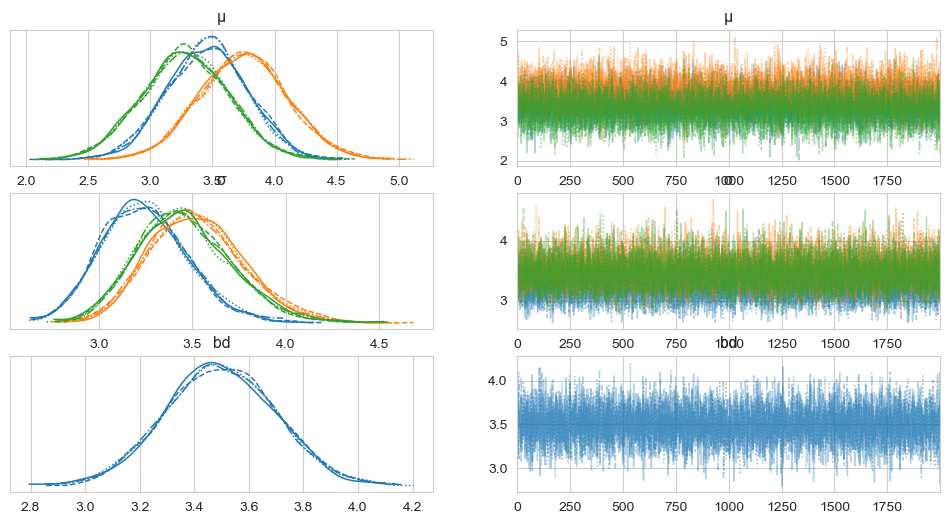

In [20]:
az.plot_trace(trace_lda);

In [21]:
az.summary(trace_lda)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ[0],3.456,0.326,2.886,4.104,0.003,0.002,11103.0,6230.0,1.0
μ[1],3.751,0.358,3.070,4.408,0.004,0.003,10179.0,6235.0,1.0
μ[2],3.280,0.351,2.615,3.934,0.004,0.003,9792.0,6985.0,1.0
σ[0],3.244,0.230,2.821,3.680,0.002,0.002,11662.0,6851.0,1.0
σ[1],3.523,0.252,3.053,3.996,0.003,0.002,9341.0,5871.0,1.0
σ[2],3.456,0.253,2.997,3.927,0.003,0.002,10146.0,6634.0,1.0
bd,3.496,0.201,3.124,3.872,0.002,0.001,10318.0,6766.0,1.0


In [22]:
with lda:
    y_pred = pm.sample_posterior_predictive(trace_lda)

Sampling: [a, b, c]


In [23]:
y_pred

Inference data with groups:
	> posterior_predictive
	> observed_data

In [24]:
posterior_lda = trace_lda.posterior.stack(samples=("chain", "draw"))

In [25]:
def classify(X, threshold):

    X = np.array(X)
    μ = posterior_1['α'].mean().values + posterior_1['β'].mean(axis=1).values.T @ np.transpose(X)
    prob = 1 / (1 + np.exp(-μ)) 
    
    return prob, np.where(prob >= threshold,1,0)

In [26]:
number = 0.99999999999999
classify(X_test_1, number)

(array([0.99991895, 0.99834024, 0.9999986 , 1.        , 1.        ,
        1.        , 0.99998937, 1.        , 1.        , 0.99849848,
        0.99999886, 1.        , 1.        , 0.55725268, 1.        ,
        1.        , 0.74410188, 1.        , 0.99005016, 0.99999979,
        1.        , 0.99999955, 1.        , 0.99983019, 0.99999997,
        0.99996822, 0.99999951, 0.99987583, 1.        , 1.        ,
        1.        , 0.99999996, 1.        , 0.99970566, 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.99999734,
        0.99999874, 1.        , 0.99998767, 0.99999983, 1.        ,
        1.        , 0.99550336, 0.99999988, 1.        , 0.99993597,
        1.        , 1.        , 0.99999947, 1.        , 1.        ,
        1.        , 1.        , 0.99999922, 1.        , 0.99999937,
        1.        , 0.99976004, 1.        , 0.99999685, 0.95904051,
        1.        , 0.99999991, 1.        , 0.99998197, 1.        ,
        0.99999974, 1.        , 1.        , 0.99

In [27]:
from sklearn.metrics import accuracy_score
y_true = pd.read_csv('test_Y_true_clf.csv')
accuracy_score(y_true, classify(X_test_1, number)[1])

0.59